#### Entropy

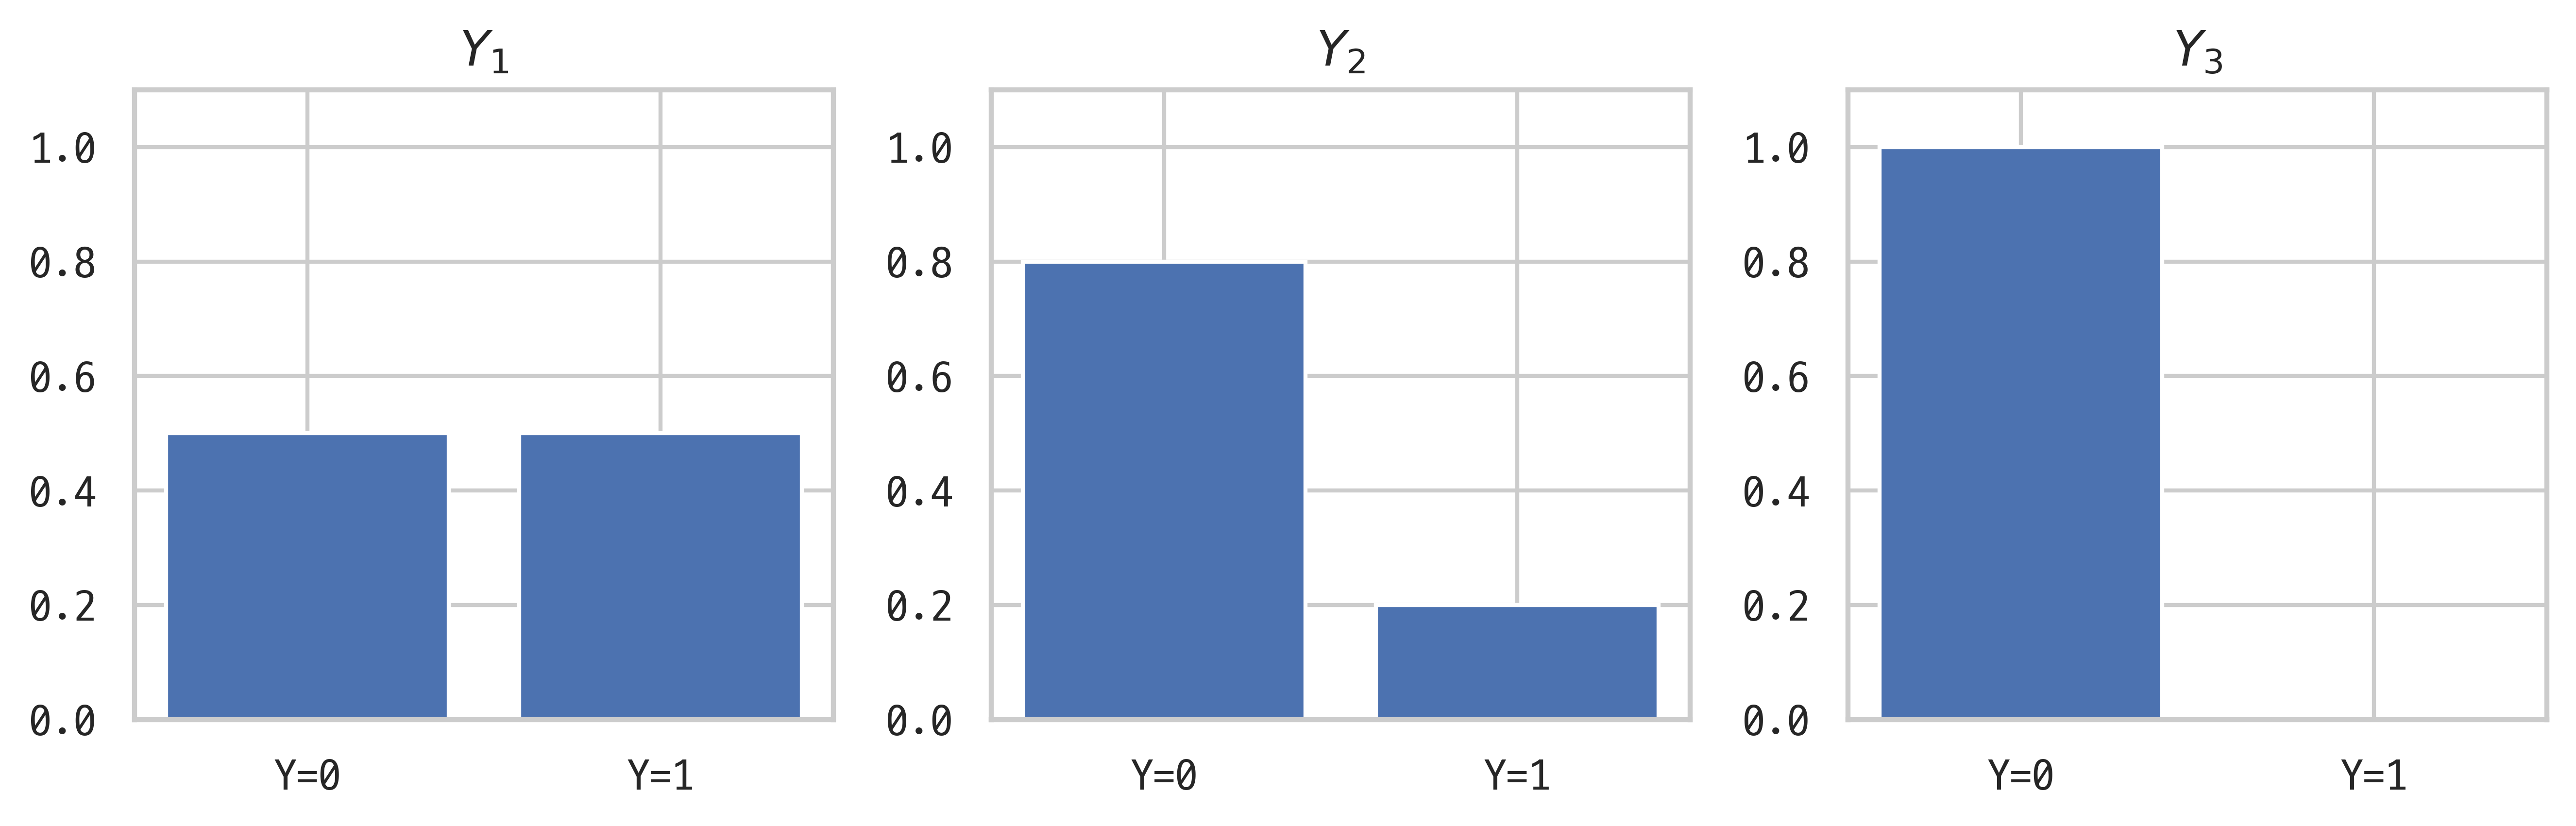

In [1]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar([0, 1], [0.5, 0.5])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_1$")
plt.subplot(132)
plt.bar([0, 1], [0.8, 0.2])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_2$")
plt.subplot(133)
plt.bar([0, 1], [1.0, 0.0])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_3$")
plt.tight_layout()
plt.show()

#### 엔트로피의 정의

In [3]:
-0.5 * np.log2(0.5) - 0.5 * np.log2(0.5)

1.0

In [4]:
-0.8 * np.log2(0.8) - 0.2 * np.log2(0.2)

0.7219280948873623

In [5]:
eps = np.finfo(float).eps
-1 * np.log2(1) - eps * np.log2(eps)

1.1546319456101628e-14

#### Ex. 10.1.1

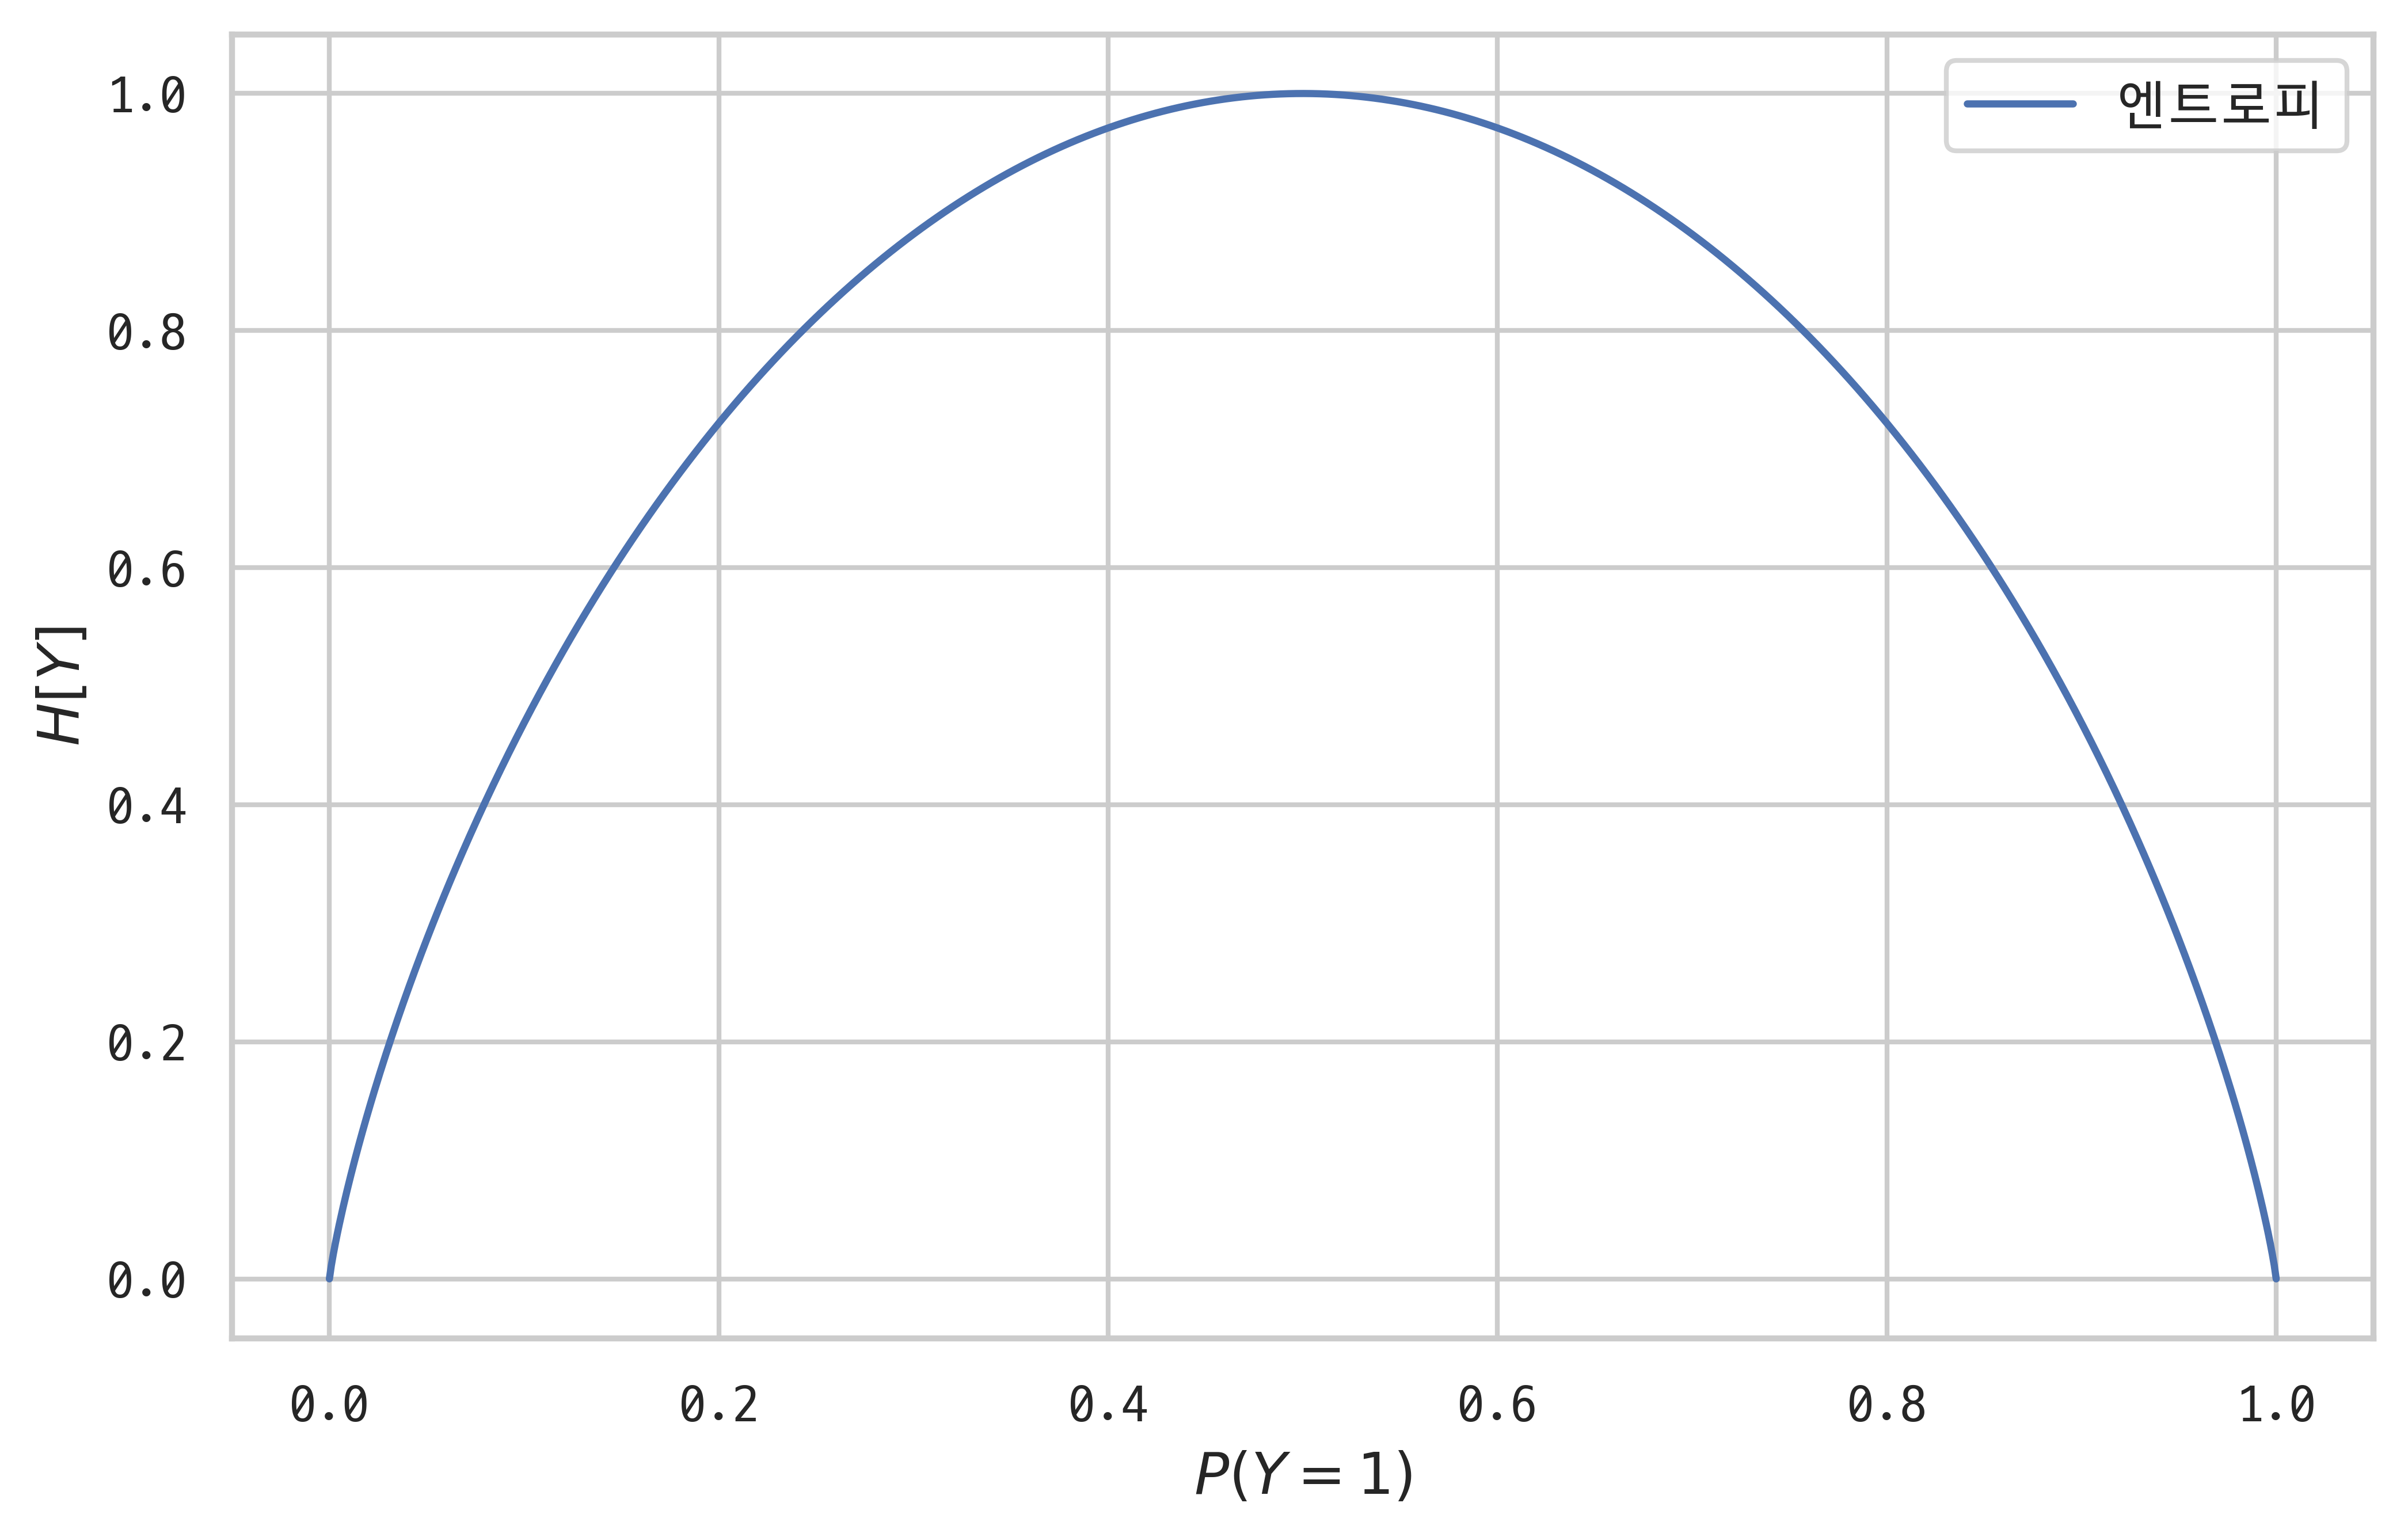

In [19]:
P0 = np.linspace(0 + eps, 1 - eps, 1000)
P1 = 1 - P0
H = - P0 * np.log2(P0) - P1 * np.log2(P1)

plt.plot(P0, H, '-', label="엔트로피")
plt.xlabel("$P(Y=1)$")
plt.ylabel("$H[Y]$")
plt.legend()
plt.show()

#### 엔트로피의 추정

In [20]:
p = [0.5, 0.5]
sp.stats.entropy(p, base=2)

1.0

#### Ex. 10.1.3

In [21]:
p = [1/3, 2/3]
sp.stats.entropy(p, base=2)

0.9182958340544894

In [22]:
p = [0.75, 0.25]
sp.stats.entropy(p, base=2)

0.8112781244591328

In [23]:
p = [1, 0]
sp.stats.entropy(p, base=2)

0.0

#### 가별길이 인코딩

In [29]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate("ABCD")]))
np.random.shuffle(doc0)
doc = "".join(doc0)
doc

'CCABACDAAABADAABAABAABAAADAAAAACACAABCDBBAABBAACABAACADDBAAAAAABAACAADAADABABAAAABAAABACABAACBABAADBCBBAAADAAADAACAAAACBABBABBCACBADBDBABAABDACAAAAAABDADDADDDCADBBBBDABDCAAABCBAADBCABBBBABBADBCAACBACC'

In [30]:
encoder = {"A": "00", "B": "01", "C": "10", "D": "11"}
encoded_doc = "".join([encoder[c] for c in doc])
encoded_doc

'1010000100101100000001001100000100000100000100000011000000000010001000000110110101000001010000100001000010001111010000000000000100001000001100001100010001000000000100000001001000010000100100010000110110010100000011000000110000100000000010010001010001011000100100110111010001000001110010000000000000011100111100111111100011010101011100011110000000011001000011011000010101010001010011011000001001001010'

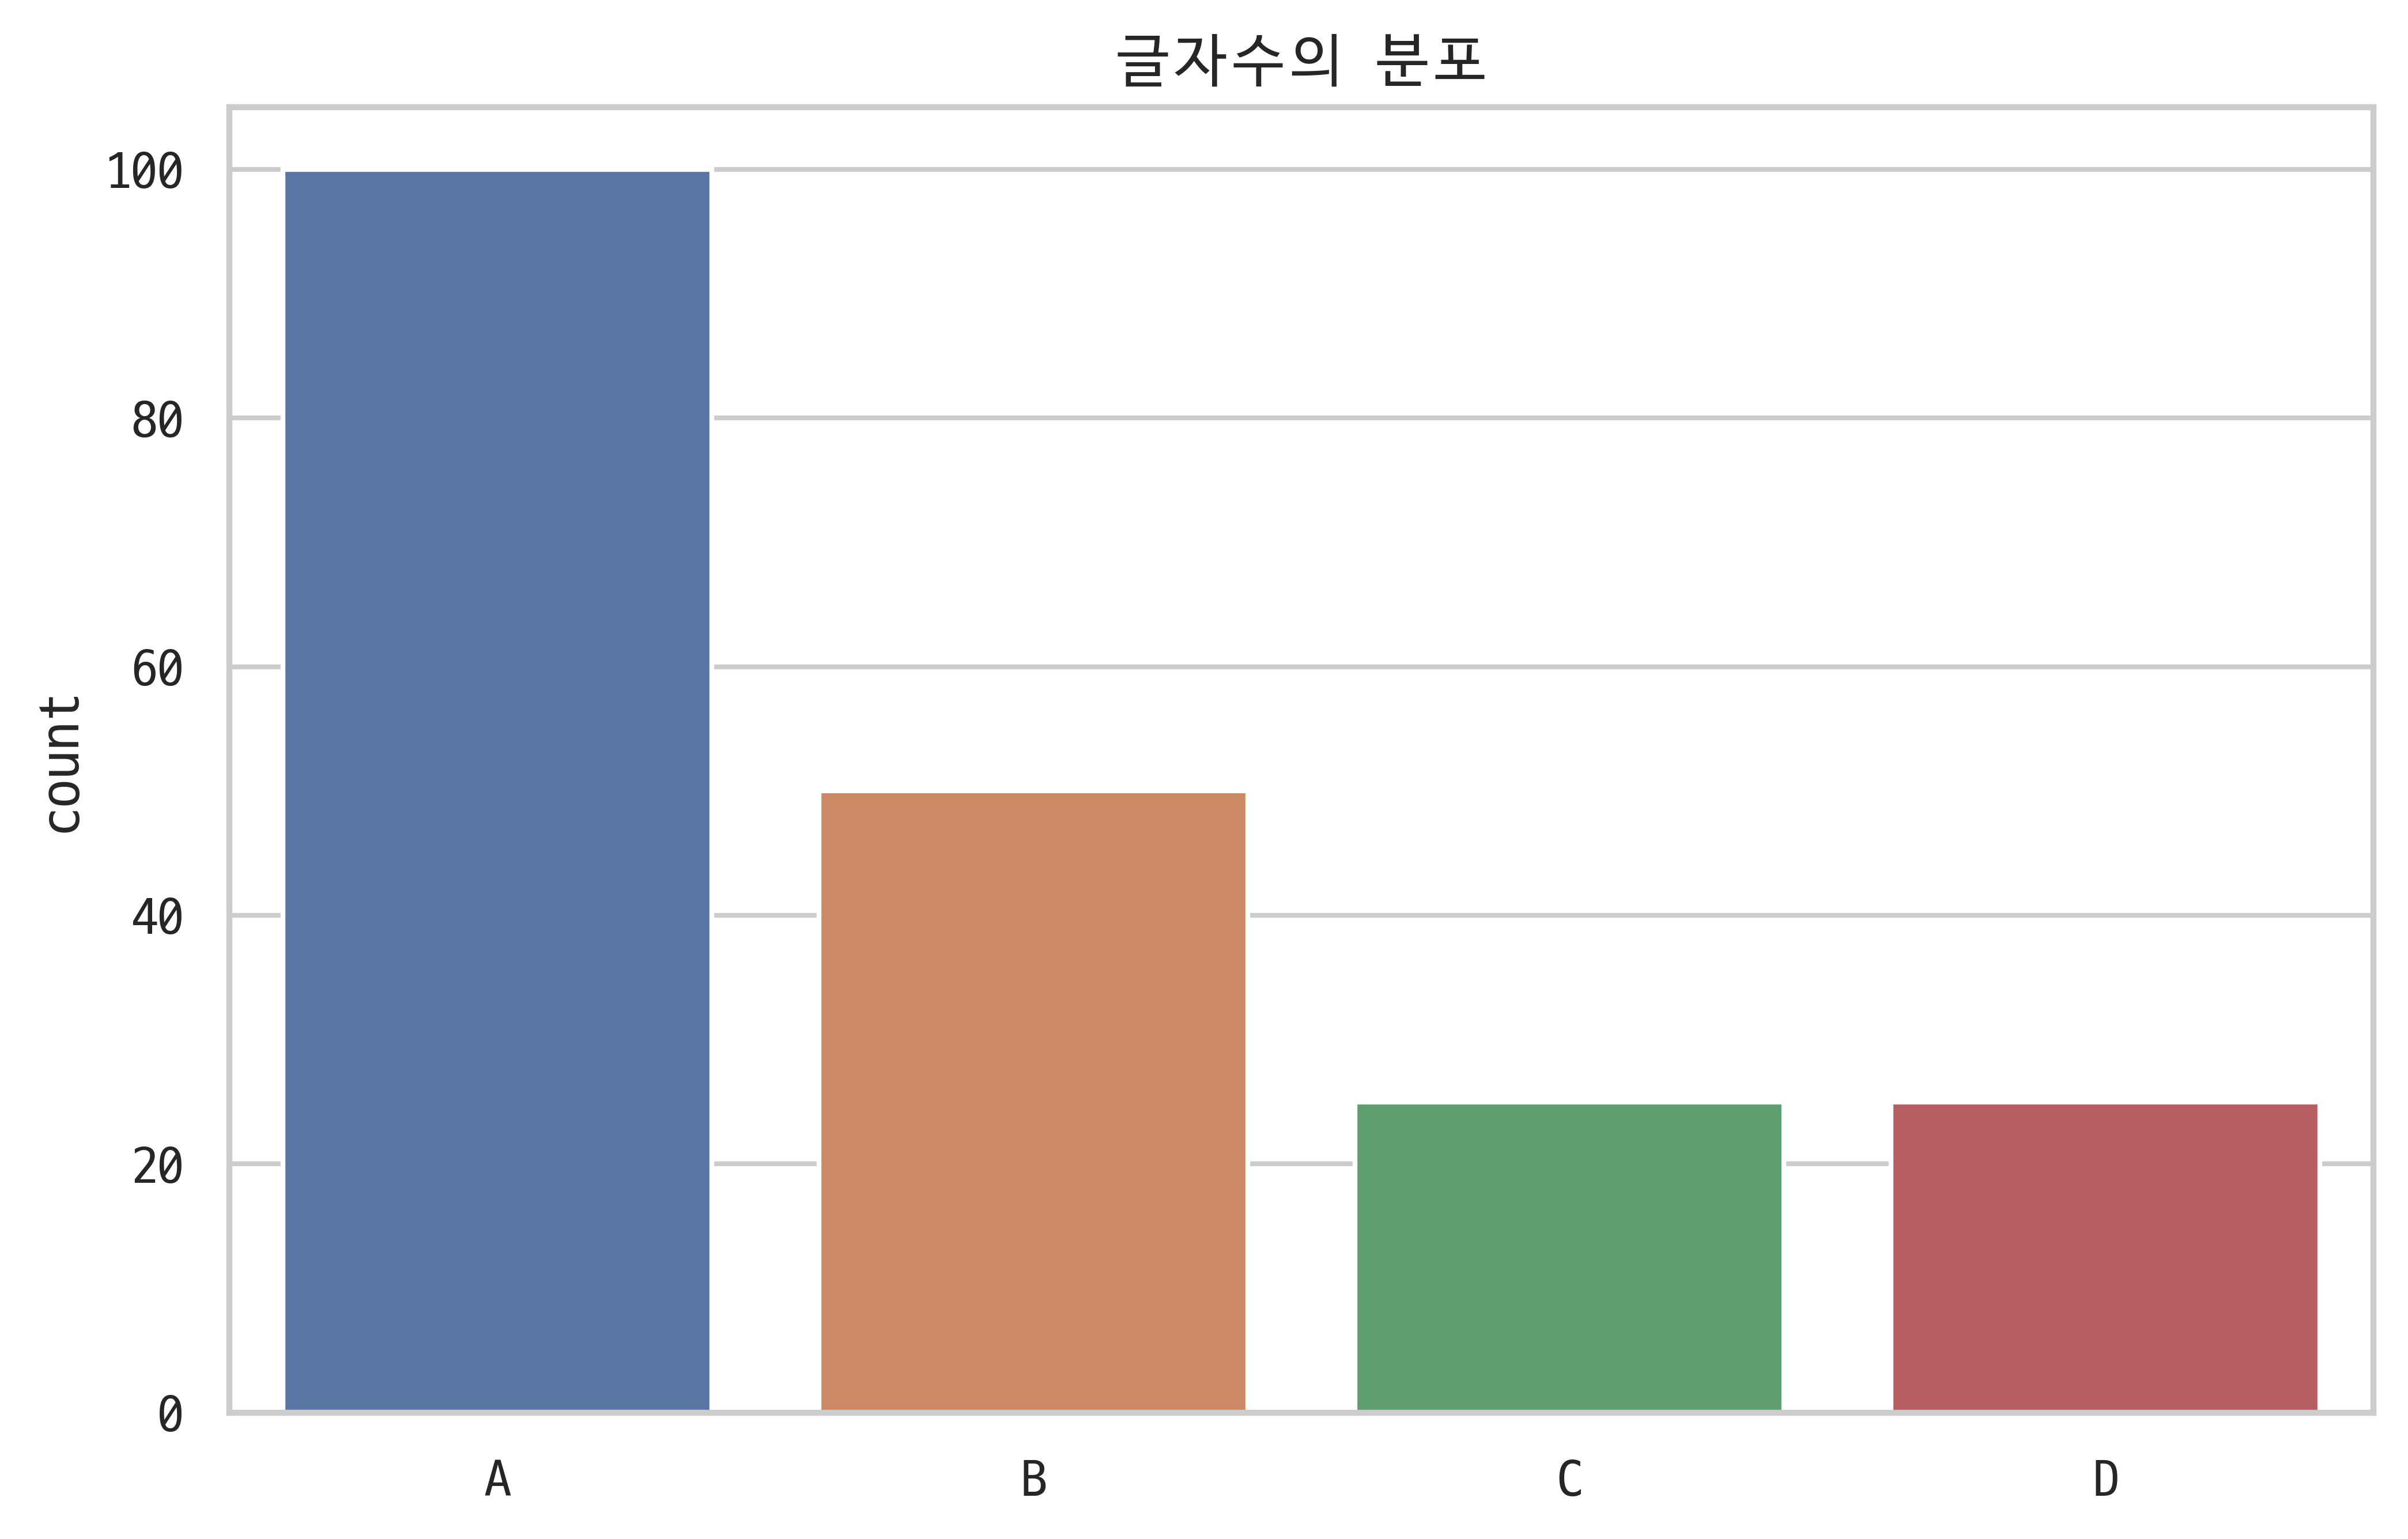

In [31]:
sns.countplot(list(doc), order="ABCD")
plt.title("글자수의 분포")
plt.show()

In [32]:
vl_encoder = {"A": "0", "B": "10", "C": "110", "D": "111"}
vl_encoded_doc = "".join([vl_encoder[c] for c in doc])
vl_encoded_doc

'11011001001101110001001110010001000100001110000011001100010110111101000101000110010001100111111100000001000110001110011101001000001000010011001000110100100011110110101000011100011100110000011010010100101011001101001111011110010001011101100000001011101111110111111111110011110101010111010111110000101101000111101100101010100101001111011000110100110110'

In [33]:
len(vl_encoded_doc)

350

In [34]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], base=2)

1.75

#### Ex.10.1.4

In [47]:
N = 200
p = [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate("ABCDEFGH")]))
np.random.shuffle(doc0)
doc = "".join(doc0)

encoder = {"A": "000", "B": "001", "C": "010", "D": "011", "E": "100", "F": "101", "G": "110", "H": "111"}
encoded_doc = "".join([encoder[c] for c in doc])

vl_encoder = {"A": "0", "B": "10", "C": "110", "D": "1110", "E": "111100", "F": "111101", "G": "111110", "H": "111111"}
vl_encoded_doc = "".join([vl_encoder[c] for c in doc])

round(len(encoded_doc) / N, 1), round(len(vl_encoded_doc) / N, 1)

(3.0, 2.0)

In [35]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64], base=2)

2.0

#### 지니불순도

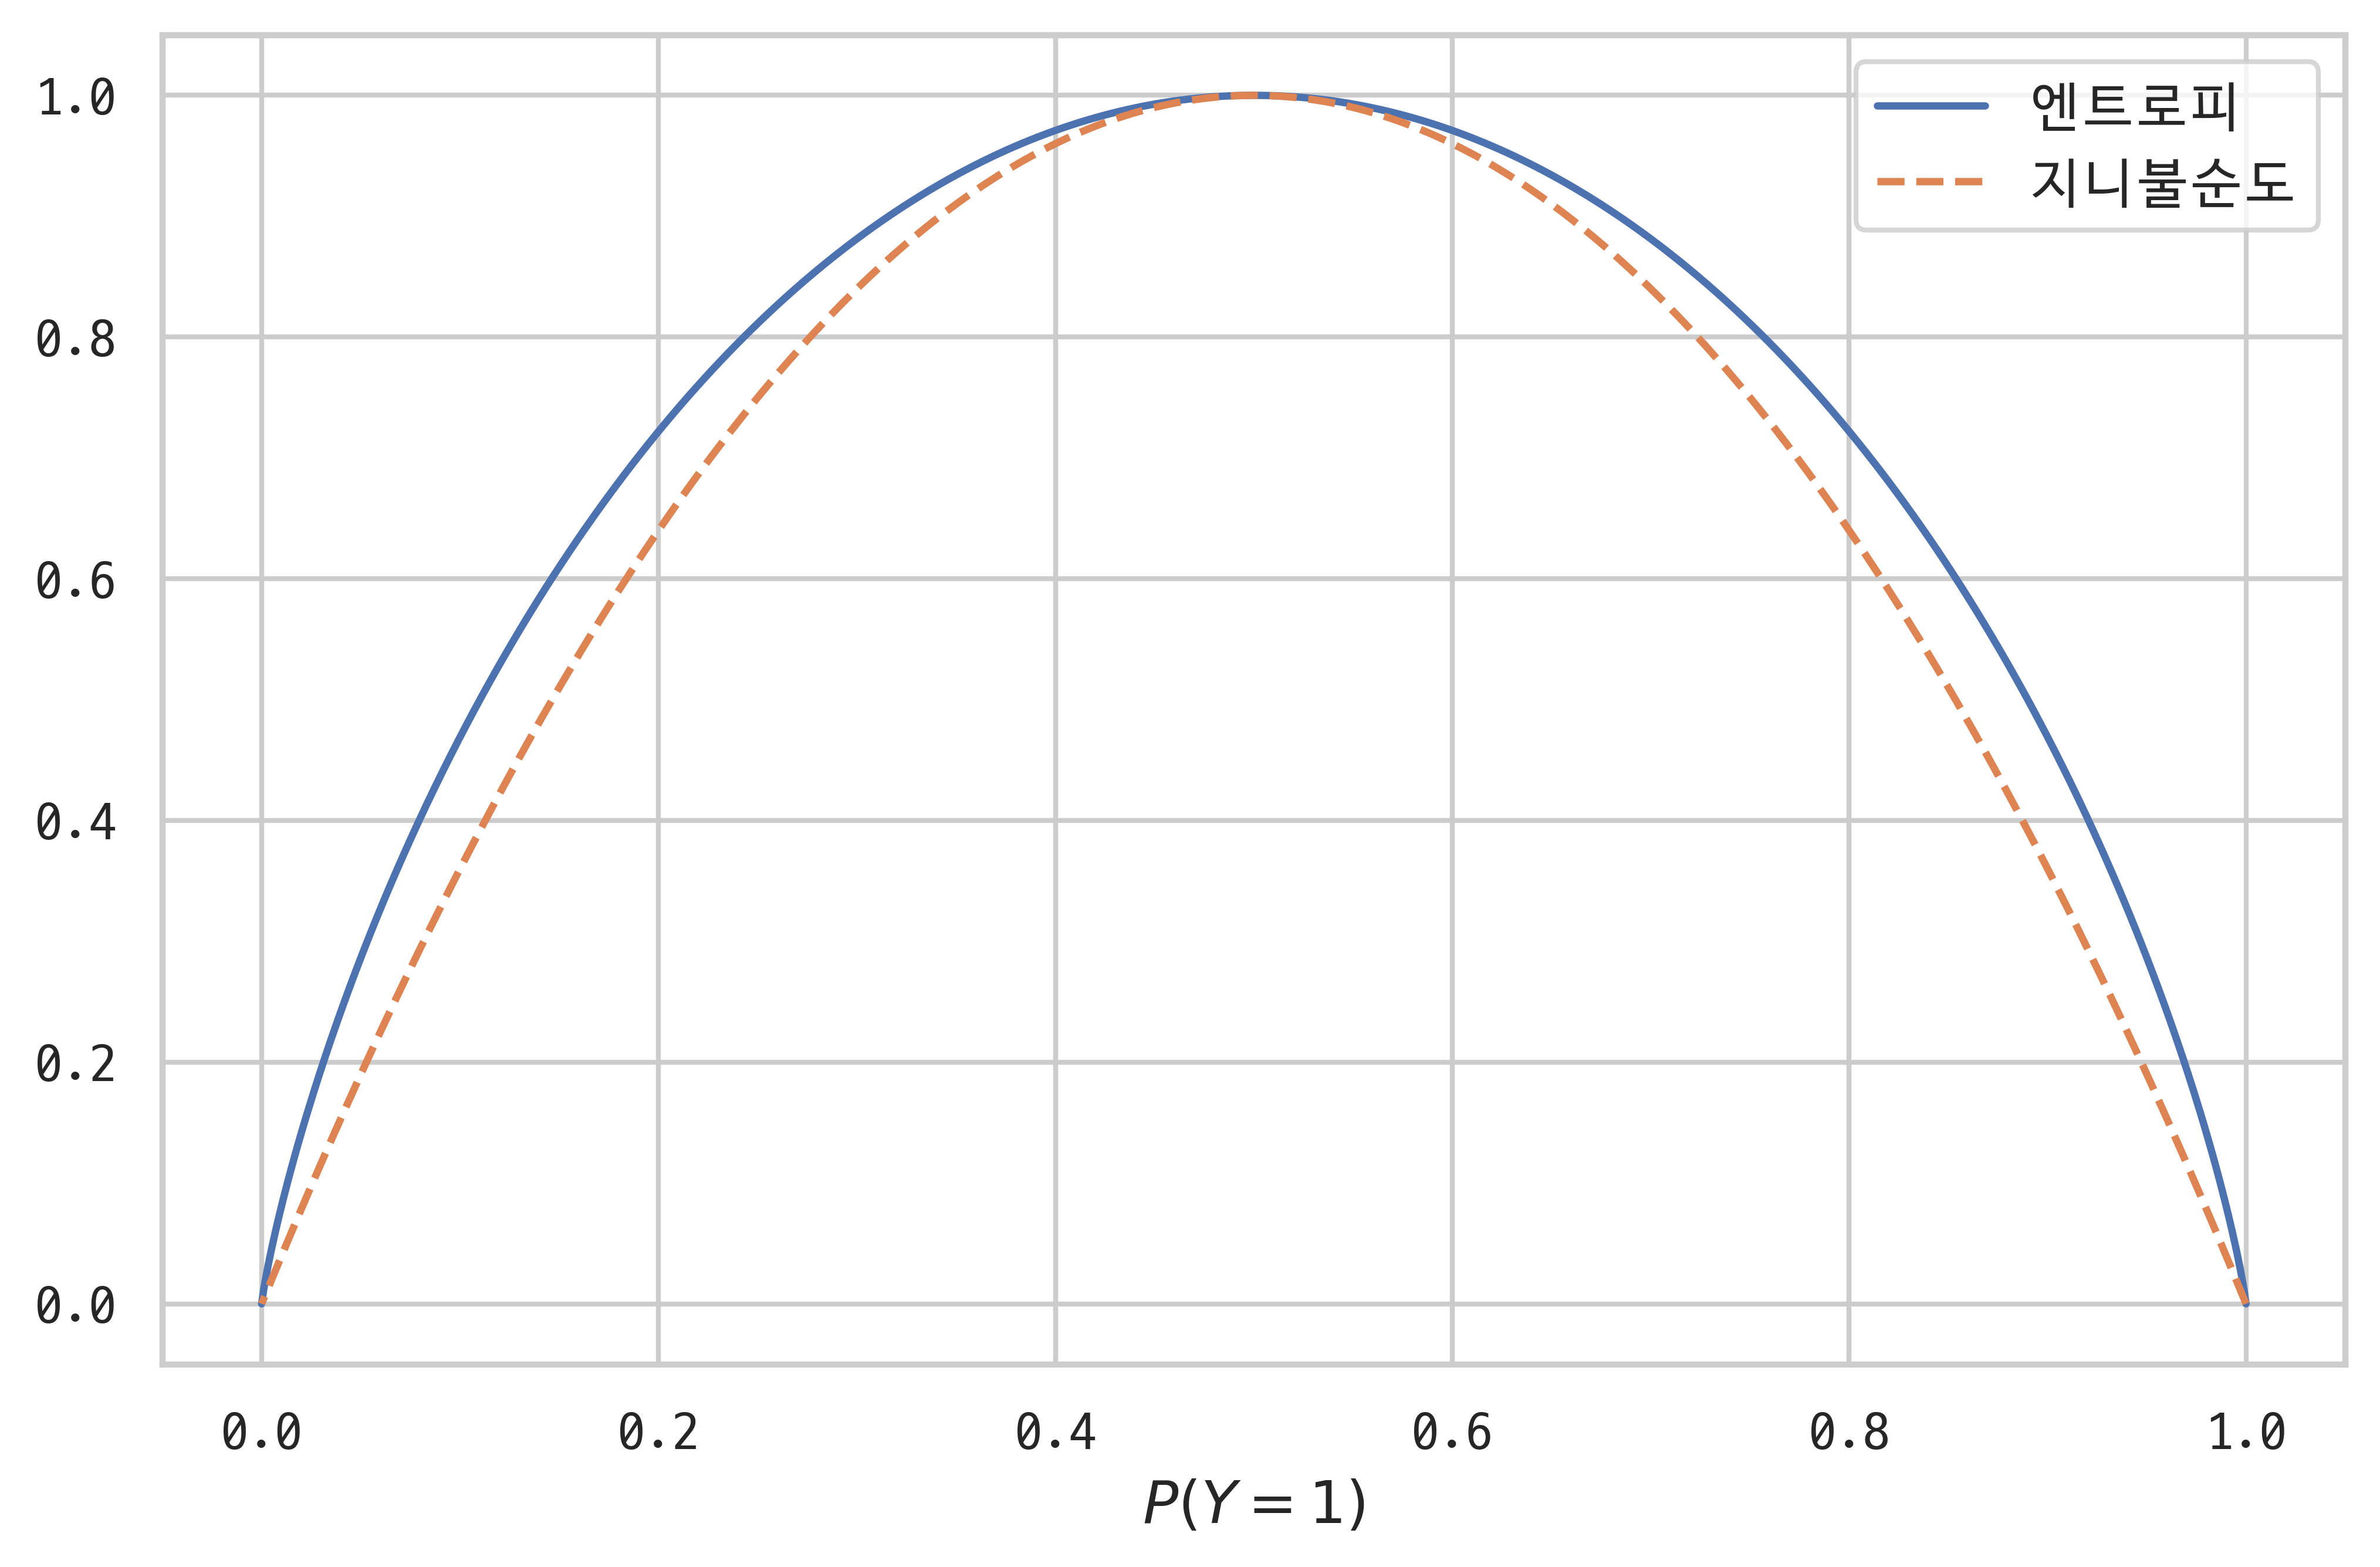

In [27]:
P0 = np.linspace(0 + eps, 1 - eps, 1000)
P1 = 1 - P0
H = - P0 * np.log2(P0) - P1 * np.log2(P1)
G = 2 * (P0 * (1 - P0) + P1 * (1 - P1))

plt.plot(P1, H, '-', label="엔트로피")
plt.plot(P1, G, '--', label="지니불순도")
plt.xlabel("$P(Y=1)$")
plt.legend()
plt.show()